In [1]:
# Ensure numpy is installed and avoid shadowing the numpy package
%pip install numpy!

#import necessary libraries:
#from mofapy2.run.entry_point import entry_point
import pandas as pd
import numpy as np
import requests



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: 'numpy!': Expected end or semicolon (after name and no valid version specifier)
    numpy!
         ^


Note: you may need to restart the kernel to use updated packages.


In [2]:
#load lipidomics data:
file = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_KO_data/DataMatrix_Hif1aLipidomics_2023_02_06.csv")

file

,Unnamed: 0,HFDHFDHFD_wt_1,HFDHFDHFD_ko_2,HFDHFDHFD_ko_3,HFDHFDHFD_ko_4,HFDCDCD_wt_5,HFDCDCD_ko_6,HFDHFDHFD_ko_7,HFDHFDHFD_wt_8,HFDHFDHFD_wt_9,...,CDCDCD_ko_34,CDCDHFD_ko_35,CDCDHFD_ko_36,CDCDHFD_wt_37,CDCDHFD_wt_38,HFDCDCD_ko_39,HFDCDCD_ko_40,HFDCDCD_wt_41,HFDCDCD_wt_42,HFDHFDHFD_wt_43
0,CE(14:0),6.650025,0.000000,4.181307,0.000000,10.938247,0.000000,3.522412,4.005629,3.575264,...,3.575227,4.566039,2.552531,0.000000,0.000000,0.000000,2.544966,24.036418,4.571681,12.281212
1,CE(16:2),0.000000,0.000000,0.000000,0.000000,6.957272,0.000000,3.000228,0.000000,4.394697,...,2.689101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CE(16:1),158.015359,451.752039,275.383565,166.915406,786.966970,117.962915,351.729455,329.589851,195.499540,...,445.117716,180.419666,146.627023,55.652486,59.057491,118.723234,147.184311,37.291394,157.485707,152.060589
3,CE(16:0),107.574454,219.146989,112.307327,144.768134,310.988967,46.599473,174.689734,184.674411,146.272612,...,159.282750,72.702119,50.450863,49.904373,46.007444,55.617250,65.431712,66.179840,95.043575,140.242586
4,CE(18:4),0.000000,0.000000,0.000000,0.000000,2.806069,0.000000,0.000000,0.000000,0.000000,...,2.086477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,TAG(67:10)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
588,TAG(67:8)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162514,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
589,TAG(67:7)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
590,TAG(67:6)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.084070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
#remove missing values
#remove features with more than 50% missing values:
data = []
for i in file.columns:
     #print(lipidomics[i].eq(0).mean())
     if file[i].eq(0).mean() <= 0.31:
        data.append(file[i])
lipidomics_wt = pd.DataFrame(data)
print(lipidomics_wt.shape)
lipidomics_wt.head()


(30, 592)


,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,590,591
Unnamed: 0,CE(14:0),CE(16:2),CE(16:1),CE(16:0),CE(18:4),CE(18:3),CE(18:2),CE(18:1),CE(18:0),CE(20:4),...,TAG(65:7)_TAGODD,TAG(65:6)_TAGODD,TAG(65:5)_TAGODD,TAG(65:4)_TAGODD,TAG(65:3)_TAGODD,TAG(67:10)_TAGODD,TAG(67:8)_TAGODD,TAG(67:7)_TAGODD,TAG(67:6)_TAGODD,TAG(67:5)_TAGODD
HFDHFDHFD_wt_1,6.650025,0.0,158.015359,107.574454,0.0,26.72863,369.692553,1114.417013,80.080463,218.553327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFDHFDHFD_ko_2,0.0,0.0,451.752039,219.146989,0.0,40.986361,733.383586,3183.535166,135.345417,258.311087,...,0.0,0.920441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFDHFDHFD_ko_3,4.181307,0.0,275.383565,112.307327,0.0,40.534273,524.852592,2288.963379,91.882237,255.231843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFDHFDHFD_ko_4,0.0,0.0,166.915406,144.768134,0.0,87.011835,908.887192,2618.446432,149.793971,237.449718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
lipidomics_wt.head()
lipidomics= lipidomics_wt.T
lipidomics.head()
lipidomics.shape

(592, 30)

In [5]:
data = []
for i in range(len(lipidomics)):
     #print(lipidomics.iloc[i].eq(0).mean())
     if lipidomics.iloc[i, 1:].eq(0).mean() <= 0.9:
        data.append(lipidomics.iloc[i])
lipidomics_remove_rows = pd.DataFrame(data)
lipidomics_remove_rows
lipidomics_remove_rows

,Unnamed: 0,HFDHFDHFD_wt_1,HFDHFDHFD_ko_2,HFDHFDHFD_ko_3,HFDHFDHFD_ko_4,HFDCDCD_wt_5,HFDCDCD_ko_6,HFDHFDHFD_ko_7,HFDHFDHFD_wt_8,HFDHFDHFD_wt_9,...,CDCDCD_ko_25,CDCDHFD_ko_28,CDCDHFD_wt_29,HFDHFDHFD_ko_30,HFDCDCD_ko_31,CDCDCD_ko_34,CDCDHFD_ko_36,CDCDHFD_wt_38,HFDCDCD_wt_42,HFDHFDHFD_wt_43
0,CE(14:0),6.650025,0.000000,4.181307,0.000000,10.938247,0.000000,3.522412,4.005629,3.575264,...,4.249713,0.000000,0.000000,8.757124,1.753378,3.575227,2.552531,0.000000,4.571681,12.281212
1,CE(16:2),0.000000,0.000000,0.000000,0.000000,6.957272,0.000000,3.000228,0.000000,4.394697,...,4.869585,0.000000,0.000000,2.186689,0.000000,2.689101,0.000000,0.000000,0.000000,0.000000
2,CE(16:1),158.015359,451.752039,275.383565,166.915406,786.966970,117.962915,351.729455,329.589851,195.499540,...,409.237245,45.995587,38.724764,222.207191,146.697250,445.117716,146.627023,59.057491,157.485707,152.060589
3,CE(16:0),107.574454,219.146989,112.307327,144.768134,310.988967,46.599473,174.689734,184.674411,146.272612,...,206.992598,39.816751,38.811357,159.831027,67.722213,159.282750,50.450863,46.007444,95.043575,140.242586
4,CE(18:4),0.000000,0.000000,0.000000,0.000000,2.806069,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.086477,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,TAG(65:9)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.103191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209684
583,TAG(65:6)_TAGODD,0.000000,0.920441,0.000000,0.000000,0.462718,2.060842,0.235740,0.625479,0.000000,...,0.134879,0.519016,0.000000,0.432755,0.449036,0.302346,0.000000,0.000000,0.162093,1.260512
584,TAG(65:5)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002993,0.000000,0.000000,0.000000,...,0.000000,0.054963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001710
585,TAG(65:4)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.213571,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.396127,0.000000,0.000000,0.000000,0.000000,0.166874,0.326771


In [6]:
# min-max normalization only on numeric columns, keep non-numeric columns unchanged
numeric_cols = lipidomics_remove_rows.select_dtypes(include=[np.number]).columns
lipidomics_normalized = lipidomics_remove_rows.copy()
lipidomics_normalized[numeric_cols] = (lipidomics_remove_rows[numeric_cols] - lipidomics_remove_rows[numeric_cols].min()) / (lipidomics_remove_rows[numeric_cols].max() - lipidomics_remove_rows[numeric_cols].min())
lipidomics_normalized.head()


,Unnamed: 0,HFDHFDHFD_wt_1,HFDHFDHFD_ko_2,HFDHFDHFD_ko_3,HFDHFDHFD_ko_4,HFDCDCD_wt_5,HFDCDCD_ko_6,HFDHFDHFD_ko_7,HFDHFDHFD_wt_8,HFDHFDHFD_wt_9,...,CDCDCD_ko_25,CDCDHFD_ko_28,CDCDHFD_wt_29,HFDHFDHFD_ko_30,HFDCDCD_ko_31,CDCDCD_ko_34,CDCDHFD_ko_36,CDCDHFD_wt_38,HFDCDCD_wt_42,HFDHFDHFD_wt_43
0,CE(14:0),2.424503e-05,4.620464e-08,7.242963e-05,7.138774e-08,0.000240,5.648912e-07,9.178725e-05,3.141452e-05,4.489026e-05,...,1.904677e-04,5.382707e-08,1.071892e-07,5.202855e-05,2.730560e-04,0.000185,8.569957e-05,5.608387e-08,6.314067e-05,4.941399e-04
1,CE(16:2),1.102010e-07,4.620464e-08,3.427218e-08,7.138774e-08,0.000153,5.648912e-07,7.818869e-05,1.792534e-08,5.517433e-05,...,2.182415e-04,5.382707e-08,1.071892e-07,1.300443e-05,3.319096e-07,0.000139,5.135322e-08,5.608387e-08,2.376491e-08,6.881045e-08
2,CE(16:1),5.735928e-04,3.311999e-03,4.768039e-03,2.508179e-03,0.017295,2.226431e-02,9.159677e-03,2.583383e-03,2.453582e-03,...,1.833623e-02,1.819884e-03,1.612788e-03,1.319783e-03,2.281794e-02,0.023036,4.920008e-03,2.094740e-03,2.174281e-03,6.117441e-03
3,CE(16:0),3.905284e-04,1.606690e-03,1.944529e-03,2.175389e-03,0.006835,8.795520e-03,4.549269e-03,1.447518e-03,1.835773e-03,...,9.274509e-03,1.575417e-03,1.616395e-03,9.493093e-04,1.053399e-02,0.008243,1.692891e-03,1.631874e-03,1.312201e-03,5.642005e-03
4,CE(18:4),1.102010e-07,4.620464e-08,3.427218e-08,7.138774e-08,0.000062,5.648912e-07,5.778597e-08,1.792534e-08,1.992538e-08,...,5.620478e-08,5.382707e-08,1.071892e-07,1.692035e-08,3.319096e-07,0.000108,5.135322e-08,5.608387e-08,2.376491e-08,6.881045e-08


C:\Users\beyra\AppData\Local\Temp\ipykernel_28520\310630239.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='Condition', y='TAG(58:9)', color='lightblue', palette='Set2')


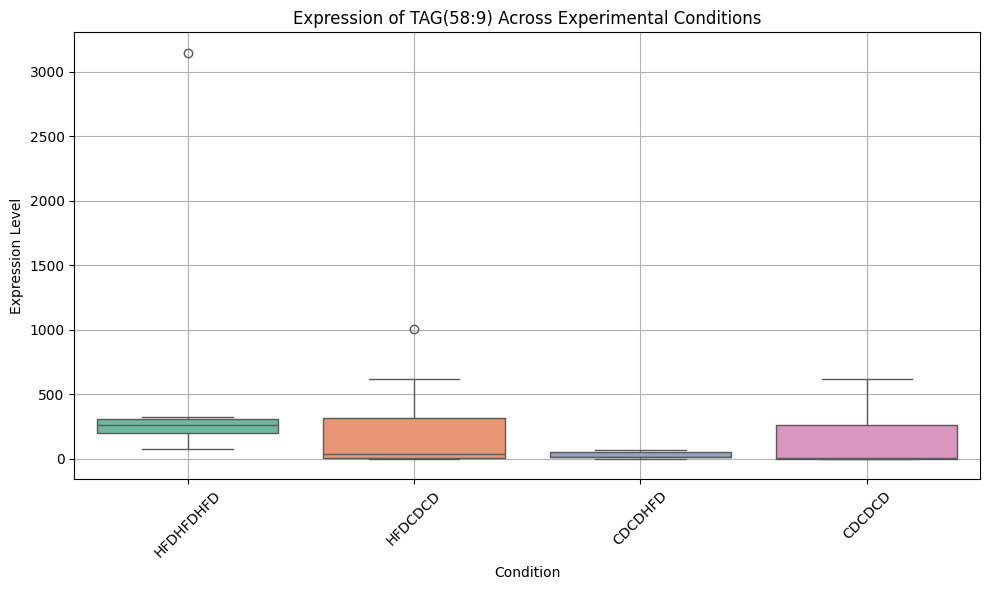

In [10]:
# Install seaborn if not already installed
#%pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Find the row for TAG(58:9) (adjust the name if needed)
tag_589_row = file[file['Unnamed: 0'].str.contains('TAG\(58:9\)', regex=True)].iloc[0]

# Extract the values (excluding the first column which is the name)
tag_589 = tag_589_row[1:]

# Extract condition labels from column names
conditions = tag_589.index.str.extract(r'([A-Za-z]+)')[0]

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'TAG(58:9)': tag_589.values.astype(float),
    'Condition': conditions
})

# Plotting boxplot of TAG(58:9) across conditions
plt.figure(figsize=(10, 6))
sns.boxplot(data=plot_df, x='Condition', y='TAG(58:9)', color='lightblue', palette='Set2')
plt.title('Expression of TAG(58:9) Across Experimental Conditions')
plt.ylabel('Expression Level')
plt.xlabel('Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()



In [8]:
gene= pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_KO_data/RowAnno_Hepatocytes_RNAseq (1).csv")
print(gene.columns)  # Print the column names to identify the correct column name
gene

Index(['Unnamed: 0', 'GENEID', 'SYMBOL', 'GENETYPE'], dtype='object')


,Unnamed: 0,GENEID,SYMBOL,GENETYPE
0,ENSMUSG00000000001.4,ENSMUSG00000000001.4,Gnai3,protein_coding
1,ENSMUSG00000000003.15,ENSMUSG00000000003.15,Pbsn,protein_coding
2,ENSMUSG00000000028.14,ENSMUSG00000000028.14,Cdc45,protein_coding
3,ENSMUSG00000000031.16,ENSMUSG00000000031.16,H19,lincRNA
4,ENSMUSG00000000037.16,ENSMUSG00000000037.16,Scml2,protein_coding
...,...,...,...,...
53459,ENSMUSG00000115846.1,ENSMUSG00000115846.1,AC107711.6,lincRNA
53460,ENSMUSG00000115847.1,ENSMUSG00000115847.1,AC109172.2,processed_pseudogene
53461,ENSMUSG00000115848.1,ENSMUSG00000115848.1,AC114008.2,processed_pseudogene
53462,ENSMUSG00000115849.1,ENSMUSG00000115849.1,AC156016.5,TEC


In [9]:
# Replace 'SYMBOL' with the actual column name from gene.columns output, e.g., 'SYMBOL'
gene = gene["SYMBOL"]  # Change 'SYMBOL' to the correct column name if needed
print(gene)
# Save the gene in an Excel file:
gene.to_excel("C:/Users/beyra/Desktop/Git Repositories/WT_KO_data/gene.xlsx", index=False)


0             Gnai3
1              Pbsn
2             Cdc45
3               H19
4             Scml2
            ...    
53459    AC107711.6
53460    AC109172.2
53461    AC114008.2
53462    AC156016.5
53463    AC118639.2
Name: SYMBOL, Length: 53464, dtype: object
